In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math as math 


In [2]:
health = pd.read_csv('../../data_sets/fetal_health.csv')
health.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
health.info()  #the general overview of the data set "Health"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
health.describe() #compute a summary of statistics pertaining to the DataFrame  

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [5]:
healthDd = health.copy() #this function determines if there's a duplicate in the dataset 
healthDd.drop_duplicates(inplace=True) #this function get rid of the duplicate if there are any in the dataset 
healthDd.shape #this function returns the shape of the array 

(2113, 22)

In [6]:
health.shape #the orginal shape of the array before checking dupilcates 

(2126, 22)

In [7]:
health=healthDd #replacing health data to healthDd data 
del healthDd #deleting healthDd  
health.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [8]:
health.drop_duplicates(inplace=True)

indep = 'fetal_health'

Xhealth = health.drop([indep],axis=1)
Xr = Xhealth 
yr = health[indep]

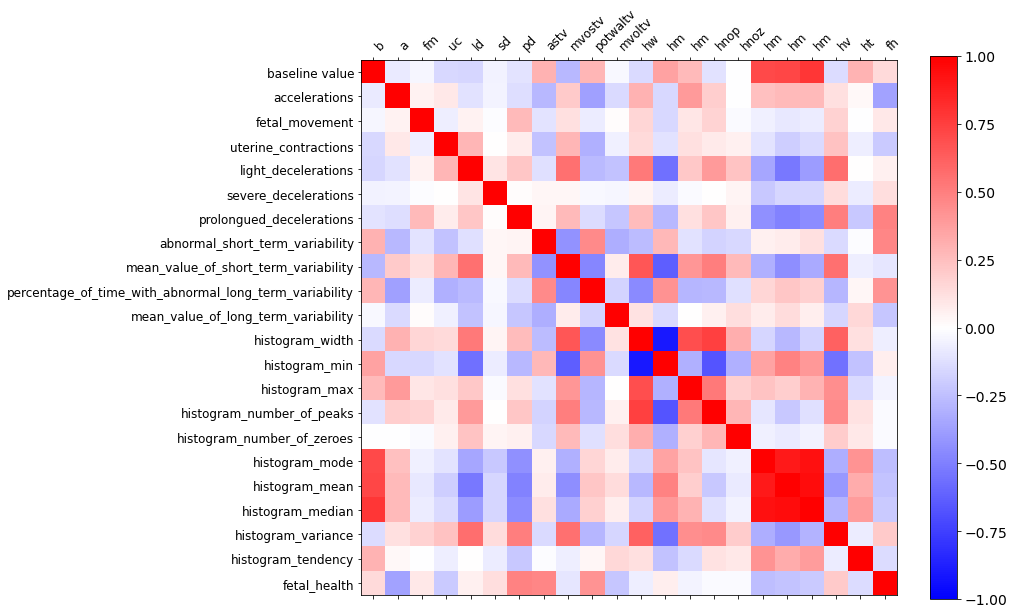

In [9]:
#

import re 

def initials (x, n=1, join_chars=""):
    splits = re.split('[_]',x)
    return join_chars.join([s[0:n] for s in splits])


corr = health.corr()

#remaining the colums

cr = corr.rename(columns=initials)

fig,ax=plt.subplots(1,figsize=(12,10))
cm = ax.matshow(cr,cmap='bwr',vmin=-1,vmax=1)
plt.xticks(range(cr.shape[1]), cr.columns,fontsize=12,rotation=45,ha='left')
plt.yticks(range(cr.shape[0]), cr.index, fontsize=12)
cb = plt.colorbar(cm)
cb.ax.tick_params(labelsize=14)

In [16]:
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.preprocessing import LabelEncoder 

from sklearn.multiclass import OneVsRestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 


x_train,x_test, y_train, y_test = train_test_split(Xr,yr,test_size = 0.30, stratify = yr, shuffle = True, random_state = 42)

model = Pipeline([('scaler', StandardScaler()), ('classifier', OneVsRestClassifier(LogisticRegression()))])

mfit = model.fit(x_train, y_train)
ypred = mfit.predict(x_test)

#confusion matrix 
print("Confusion Matrix:")
print(confusion_matrix(y_test,ypred))
print()
print(classification_report(y_test,ypred))

Confusion Matrix:
[[474  20   0]
 [ 34  52   2]
 [  4  10  38]]

              precision    recall  f1-score   support

         1.0       0.93      0.96      0.94       494
         2.0       0.63      0.59      0.61        88
         3.0       0.95      0.73      0.83        52

    accuracy                           0.89       634
   macro avg       0.84      0.76      0.79       634
weighted avg       0.89      0.89      0.89       634



In [11]:
#{from sklearn.metrics import roc_curve, precision_recall_curve, auc 

#Xrc = Xr.copy()

#X = pd.DataFrame(StandardScaler().fit_transform(Xrc), columns = Xrc.columns)


#decf = np.dot(X,model.coef_)

#plt.figure()

#sns.violinplot(y=decf,x=y)

#for th in model.theta_:
    #plt.axhline(th,color='r', alpha=0.5)

#plt.ylabel('decision function')

In [12]:

#scores = model.predict_proba(Xtest)

#all_fpr = []
#all_tpr = []

#for ii in [1,2]: 
    #cno = model.classes_[ii]
    #fpr,tpr,thresholds = roc_curve(ytest>=cno, np.sum(scores[:, model.classes_>= cno],axis=1))

    #plt.plot(fpr,tpr)
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')

    #db = math.exp(model.theta_)/(1+math.exp(model.theta_))
    #idx = (thresholds>db[0]) & (thresholds<db[1])
    #plt.plot(fpr[idx], tpr[idx])

   # print(auc(fpr,tpr))

In [14]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(solver = 'liblinear').fit(x_train, y_train)
y_predict = model.predict(x_test)
print("Score:", model.score(x_test,y_test))
print(model.predict_proba(x_test))

Score: 0.8753943217665615
[[7.02579213e-01 2.94627954e-01 2.79283308e-03]
 [9.98272344e-01 1.58218521e-03 1.45470820e-04]
 [5.63848157e-03 4.49581860e-01 5.44779659e-01]
 ...
 [9.29087009e-01 7.02903938e-02 6.22596710e-04]
 [6.89602312e-01 3.08447466e-01 1.95022231e-03]
 [8.08231432e-01 1.75428978e-01 1.63395897e-02]]
